In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28*28 (flattened image)
hidden_size = 500 # number of neurons
num_classes = 10 # Target feature - digits - 0,1,2,3,...9 
num_epochs = 5 # Total number of times the model gets to see the whole data
batch_size = 100 # How many samples do we want to pass at a time to the model
learning_rate = 0.001 

In [3]:
# MNIST dataset - to predict handwritten digits (digits 0-9, 28*28 image)
train_dataset = torchvision.datasets.MNIST(root='data/mnist', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data/mnist', 
                                          train=False, 
                                          transform=transforms.ToTensor())
# `transforms.ToTensor()` - Converts training examples into tensors

# Data loader
# 60000 samples
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=True)
# shufffling is done for the generalization of data seen by the model
print(len(train_loader))

600


In [36]:
# How data looks like??
# Iterating over data loaders
# for data in train_loader:
#     print(data)
#     break
"""
100 handwritten-digits and 100 labels/target classes
"""

'\n100 handwritten-digits and 100 labels/target classes\n'

In [5]:
print(data[0].shape)
print(data[1].shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


In [6]:
x, y = data[0][0], data[1][0] # digit and the target class

print(y)


tensor(0)


In [37]:
# print(x)

In [8]:
print(x.shape)
# when read using torchvision shape is 1x28x28 (not sure of why?)

torch.Size([1, 28, 28])


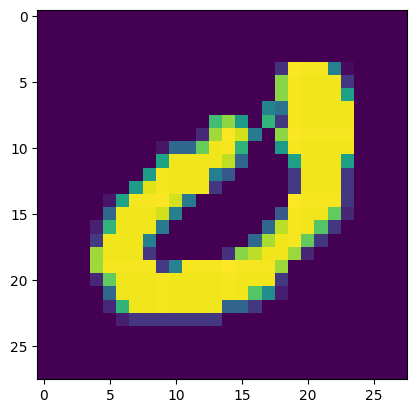

In [9]:
plt.imshow(x.view(28,28))

In [10]:
# Check the total count of each digit present in the training data
total_count = 0
count_of_labels = dict()
for data in train_loader:
    xs, ys = data
    for label in ys:
        label = int(label)
        if label in count_of_labels:
            count_of_labels[label] += 1
        else:
            count_of_labels[label] = 1
        total_count += 1
print(count_of_labels)
print(total_count)

{5: 5421, 6: 5918, 8: 5851, 3: 6131, 0: 5923, 2: 5958, 1: 6742, 7: 6265, 4: 5842, 9: 5949}
60000


In [11]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU() 
        self.fc2 = nn.Linear(hidden_size, num_classes) 
        # output layer only has 10 neurons (10 digits)
    
    # feed forward flow defined here
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out) # activation req. for non-linearity
        out = self.fc2(out)
        return nn.functional.log_softmax(out, dim=1)

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [12]:
model

NeuralNet(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [13]:
for data in train_loader:
    sample_data = data
    break
xs, ys = sample_data

In [14]:
ys[0]

tensor(1)

In [15]:
# xs[0] # handwritten digit 4
print(xs[0].shape)

torch.Size([1, 28, 28])


In [16]:
model(xs[0].view(-1, 28*28))

tensor([[-2.3490, -2.3737, -2.3288, -2.2720, -2.3589, -2.2463, -2.3709, -2.2362,
         -2.2865, -2.2191]], grad_fn=<LogSoftmaxBackward0>)

In [17]:
X = (torch.rand(28*28)).view(-1, 28*28)# the size -1 is inferred from other dimensions
X.shape
# model(X) # grad_fn=<LogSoftmaxBackward0>)
"""
tensor([[-14.0670, -10.2727,  -7.2277,  -0.0969, -37.4099,  -2.4580, -10.4187,
          -5.2250,  -7.4856, -24.2775]], grad_fn=<LogSoftmaxBackward0>)
"""

'\ntensor([[-14.0670, -10.2727,  -7.2277,  -0.0969, -37.4099,  -2.4580, -10.4187,\n          -5.2250,  -7.4856, -24.2775]], grad_fn=<LogSoftmaxBackward0>)\n'

In [18]:
# model.parameters()

In [19]:
# for p in model.parameters():
#     print(p)

In [28]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
train_cost = []
iterations = 0
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device) # -1 because dependent on batch size
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images) # need not call forward()
        loss = criterion(outputs, labels)
        train_cost.append(loss.item())
        
        # Backward and optimize
        optimizer.zero_grad() # Otherwise gradients keep summing up
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        iterations += 1

Epoch [1/5], Step [100/600], Loss: 0.0410
Epoch [1/5], Step [200/600], Loss: 0.0068
Epoch [1/5], Step [300/600], Loss: 0.0040
Epoch [1/5], Step [400/600], Loss: 0.0560
Epoch [1/5], Step [500/600], Loss: 0.0033
Epoch [1/5], Step [600/600], Loss: 0.0121
Epoch [2/5], Step [100/600], Loss: 0.0125
Epoch [2/5], Step [200/600], Loss: 0.0016
Epoch [2/5], Step [300/600], Loss: 0.0015
Epoch [2/5], Step [400/600], Loss: 0.0050
Epoch [2/5], Step [500/600], Loss: 0.0326
Epoch [2/5], Step [600/600], Loss: 0.0269
Epoch [3/5], Step [100/600], Loss: 0.0011
Epoch [3/5], Step [200/600], Loss: 0.0023
Epoch [3/5], Step [300/600], Loss: 0.0063
Epoch [3/5], Step [400/600], Loss: 0.0021
Epoch [3/5], Step [500/600], Loss: 0.0206
Epoch [3/5], Step [600/600], Loss: 0.0014
Epoch [4/5], Step [100/600], Loss: 0.0025
Epoch [4/5], Step [200/600], Loss: 0.0007
Epoch [4/5], Step [300/600], Loss: 0.0006
Epoch [4/5], Step [400/600], Loss: 0.0173
Epoch [4/5], Step [500/600], Loss: 0.0052
Epoch [4/5], Step [600/600], Loss:

In [35]:
# plt.plot(np.arange(iterations), train_cost)
# plt.title("Training cost")
# plt.show()

In [30]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # print(outputs.data)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 97.83 %


In [31]:
# !pip install torchvision

In [32]:
images.shape

torch.Size([100, 784])

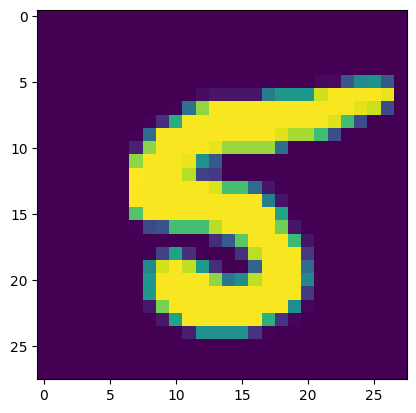

In [33]:
plt.imshow(images[0].view(28,28))
plt.show()

In [34]:
labels[0]

tensor(5)